## 오차역전파 (Backpropagation)


### 오차역전파 알고리즘
- 학습 데이터로 정방향(forward) 연산을 통해 손실함수 값(loss)을 구함

- 각 layer별로 역전파학습을 위해 중간값을 저장

- 손실함수를 학습 파라미터(가중치, 편향)로 미분하여  
  마지막 layer로부터 앞으로 하나씩 연쇄법칙을 이용하여 미분
  각 layer를 통과할 때마다 저장된 값을 이용

- 오류(error)를 전달하면서 학습 파라미터를 조금씩 갱신


### 오차역전파 학습의 특징
- 손실함수를 통한 평가를 한 번만 하고, 연쇄법칙을 이용한 미분을 활용하기 때문에  
  학습 소요시간이 매우 단축!

- 미분을 위한 중간값을 모두 저장하기 때문에 메모리를 많이 사용


### 신경망 학습에 있어서 미분가능의 중요성
- 경사하강법(Gradient Descent)에서 손실 함수(cost function)의 최소값,  
  즉, 최적값을 찾기 위한 방법으로 미분을 활용

- 미분을 통해 손실 함수의 학습 매개변수(trainable parameter)를 갱신하여  
  모델의 가중치의 최적값을 찾는 과정

![](https://i.pinimg.com/originals/5d/13/20/5d1320c7b672710834e63b95a7c1037b.png)

<sub>출처: https://www.pinterest.co.kr/pin/424816177350692379/</sub>

### 합성함수의 미분 (연쇄법칙, chain rule)

## $\qquad \frac{d}{dx} [f(g(x))] = f^\prime(g(x))g^\prime(x)$  


- 여러 개 연속으로 사용가능  
  ## $ \quad \frac{\partial f}{\partial x} = \frac{\partial f}{\partial u} \times \frac{\partial u}{\partial m} \times \frac{\partial m}{\partial n} \times \ ... \ \frac{\partial l}{\partial k} \times \frac{\partial k}{\partial g} \times \frac{\partial g}{\partial x} $
- 각각에 대해 편미분 적용가능

![](https://cdn-media-1.freecodecamp.org/images/1*_KMMFvRP5X9kC59brI0ykw.png)
<sub>출처: https://www.freecodecamp.org/news/demystifying-gradient-descent-and-backpropagation-via-logistic-regression-based-image-classification-9b5526c2ed46/</sub>

- **오차역전파의 직관적 이해**
  - 학습을 진행하면서, 즉 손실함수의 최소값(minimum)을 찾아가는 과정에서 가중치 또는 편향의 변화에 따라 얼마나 영향을 받는지 알 수 있음



#### 합성함수 미분(chain rule) 예제

![](https://miro.medium.com/max/1000/1*azqHvbrNsZ8AIZ7H75tbIQ.jpeg)

<sub>출처: https://medium.com/spidernitt/breaking-down-neural-networks-an-intuitive-approach-to-backpropagation-3b2ff958794c</sub>

  #### $\quad a=-1, \ b=3, \ c=4$,
  #### $\quad x = a + b, \ y = b + c, \ f = x * y \ 일 때$    



  ###
  $
  \quad \begin{matrix}\frac{\partial f}{\partial x} &=& y\ + \ x \ \frac{\partial y}{\partial x} \\
  &=& (b \ + \ c) \ + \ (a \ +\ b)\ \times \ 0 \\
  &=& 7 \end{matrix}
  $

  ### 
  $\quad \begin{matrix}\frac{\partial f}{\partial y} &=& x\ + \ \frac{\partial x}{\partial y} \ y \\
  &=& (a \ + \ b) \ + \ 0 \times (b \ +\ c) \\
  &=& 2 \end{matrix}$

   <br>

  ### 
  $ \quad \begin{matrix} \frac{\partial x}{\partial a} &=& 1 \ + \ a \ \frac{\partial b}{\partial a} \\
  &=& 1 \end{matrix} $
  ### 
  $ \quad \begin{matrix} \frac{\partial y}{\partial c} &=& \frac{\partial b}{\partial c}\ + 1 \\
   &=& 1 \end{matrix} $
  
  <br>

  ### 
  $ \quad \begin{matrix} \frac{\partial f}{\partial a} &=& \frac{\partial f}{\partial x} \times \frac{\partial x}{\partial a} \\
  &=& y \times 1 \\
  &=& 7 \times 1 = 7 \\
  &=& 7  \end{matrix} $
    
  ### 
  $ \quad \begin{matrix} \frac{\partial f}{\partial b}\
  &=& \frac{\partial x}{\partial b} \ y \ + \ x \ \frac{\partial y}{\partial b}  \\
  &=& 1 \times 7 + 2 \times 1  \\
  &=& 9 \end{matrix} $
  

  
  

### 덧셈, 곱셈 계층의 역전파
- 위 예제를 통해 아래 사항을 알 수 있음

  #### 1. $\quad z = x + y$ 일 때,
  ## $\frac{\partial z}{\partial x} = 1, \frac{\partial z}{\partial y} = 1 $

  #### 2. $\quad t = xy$ 일 때,
  ## $\frac{\partial t}{\partial x} = y, \frac{\partial t}{\partial y} = x$


In [557]:
class Mul():
    def __init__(self):
        self.x = None
        self.y = None

    def forward(self, x, y):
        self.x = x
        self.y = y
        res = x * y
        return res
    
    def backward(self, dres):
        dx = dres * self.y
        dy = dres * self.x
        return dx, dy

In [558]:
class Add():
    def __init__(self):
        self.x = None
        self.y = None
    
    def forward(self, x, y):
        self.x = x
        self.y = y
        res = x + y
        return res
    
    def backward(self, dres):
        dx = dres * 1
        dy = dres * 1
        return dx, dy

In [559]:
a, b, c = -1, 3, 4
x = Add()
y = Add()
f = Mul()

In [560]:
x_res = x.forward(a, b)
y_res = y.forward(b, c)
res = f.forward(x_res, y_res)

print(x_res, y_res, res)

2 7 14


In [561]:
dres = 1
dx_mul, dy_mul = f.backward(dres)
da_add, db_add_1 = x.backward(dx_mul)
db_add_2, dc_add = y.backward(dy_mul)

print(dx_mul, dy_mul, da_add, db_add_1 + db_add_2, dc_add, sep="\n")

7
2
7
9
2


![](https://miro.medium.com/max/2000/1*U3mVDYuvnaLhJzIFw_d5qQ.png)
<sub>출처: https://medium.com/spidernitt/breaking-down-neural-networks-an-intuitive-approach-to-backpropagation-3b2ff958794c</sub>

### 활성화 함수(Activation)에서의 역전파

#### 시그모이드(Sigmoid) 함수

![](https://media.geeksforgeeks.org/wp-content/uploads/20190911181329/Screenshot-2019-09-11-18.05.46.png)

<sub>출처: https://www.geeksforgeeks.org/implement-sigmoid-function-using-numpy/</sub>

- 수식
  # $\quad y = \frac{1}{1 + e^{-x}} $일 때,

  ## 
  $\quad \begin{matrix}y' &=& (\frac{1}{1 + e^{-x}})' \\
  &=& \frac{-1}{(1 + e^{-x})^2}\ \times \ (-e^{-x}) \\
  &=& \frac{1}{1 + e^{-x}} \ \times \ \frac{e^{-x}}{1 + e^{-x}} \\
  &=& \frac{1}{1 + e^{-x}} \ \times \ (1 - \frac{1}{1 + e^{-x}}) \\
  &=& y\ (1\ - \ y)
  \end{matrix}$

In [562]:
import numpy as np

class Sigmoid():
    def __init__(self):
        self.out = None
    
    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        return out

    def backward(self, dout):
        dx = dout * self.y * (1 - self.y) 
        return dx

#### ReLU 함수

![](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2018/10/Line-Plot-of-Rectified-Linear-Activation-for-Negative-and-Positive-Inputs.png)

<sub>출처: https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/</sub>


- 수식  

  ### 
  $\qquad y=
  \begin{cases}
  x & (x \ge 0)  \\
  0 & (x < 0)
  \end{cases}$ 일 때,

  <br>

  ### 
  $\qquad \frac{\partial y}{\partial x}=
  \begin{cases}
  1 & (x \ge 0)  \\
  0 & (x < 0)
  \end{cases}$

In [563]:
class ReLU():
    def __init__(self):
        self.out = None
    
    def forward(self, x):
        self.mask = x < 0
        out = x.copy()
        out[self.mask] = 0
        return out
    
    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout
        return dx

### 행렬 연산에 대한 역전파

# $\qquad Y = X \bullet W + B$

#### 순전파(forward)
  
  - 형상(shape)을 맞춰줘야함
  - 앞서 봤던 곱셈, 덧셈 계층을 합친 형태

In [564]:
X = np.random.rand(3)
W = np.random.rand(3, 2)
B = np.random.rand(2)

print(X.shape, W.shape, B.shape)

(3,) (3, 2) (2,)


In [565]:
Y = np.dot(X, W) + B

print(Y.shape)

(2,)


#### 역전파(1)

##  $\  Y = X \bullet W$
- $X :\ \ (2,\ )$

- $W :\ \ (2,\ 3)$

- $X \bullet W :\ \ (3,\ )$

- $\frac{\partial L}{\partial Y} :\ \ (3,\ )$

- $\frac{\partial L}{\partial X} = \frac{\partial L}{\partial Y}\bullet W^T ,\ (2,\ )$

- $\frac{\partial L}{\partial W} = X^T \bullet \frac{\partial L}{\partial Y} ,\ (2,\ 3)$



In [566]:
X = np.random.randn(2)
W = np.random.rand(2, 3)
Y = np.dot(X, W)

print("X", X, sep="\n")
print("Y", Y, sep="\n")
print("W", W, sep="\n")

X
[-0.38900963  0.6318091 ]
Y
[0.39452757 0.18677587 0.39179564]
W
[[0.25317015 0.98456987 0.58749728]
 [0.78031988 0.90182784 0.98184364]]


In [567]:
dL_dY = np.random.randn(3)
dL_dX = np.dot(dL_dY, W.T)
dL_dW = np.dot(X.reshape(-1, 1), dL_dY.reshape(1, -1))

print("dL_dY", dL_dY, sep="\n")
print("dL_dX", dL_dX, sep="\n")
print("dL_dW", dL_dW, sep="\n")

dL_dY
[0.46924145 0.14483537 0.31223059]
dL_dX
[0.4448331  0.80333663]
dL_dW
[[-0.18253944 -0.05634236 -0.12146071]
 [ 0.29647102  0.09150831  0.19727013]]


#### 역전파(2)

## $\ (2)\  Y = X \bullet W + B$
- $X, W$는 위와 동일

- $B: \ (3, )$

- $\frac{\partial L}{\partial B} = \frac{\partial L}{\partial Y}, \ (3,\ )$

In [568]:
X = np.random.randn(2)
W = np.random.randn(2, 3)
B = np.random.randn(3)
Y = np.dot(X, W) + B

Y

array([ 0.09684653, -0.80431901, -0.86016578])

In [569]:
dL_dY = np.random.randn(3)
dL_dX = np.dot(dL_dY, W.T)
dL_dW = np.dot(X.reshape(-1, 1), dL_dY.reshape(1, -1))
dL_dB = dL_dY

print("dL_dY", dL_dY, sep="\n")
print("dL_dX", dL_dX, sep="\n")
print("dL_dW", dL_dW, sep="\n")
print("dL_dB", dL_dB, sep="\n")

dL_dY
[ 0.72633818  1.11406721 -0.02497841]
dL_dX
[-1.29036487 -0.2408421 ]
dL_dW
[[ 0.19020717  0.2917423  -0.00654113]
 [-0.51644714 -0.79213353  0.01776036]]
dL_dB
[ 0.72633818  1.11406721 -0.02497841]


#### 배치용 행렬 내적 계층
- N개의 데이터에 대해,  
# $\qquad Y = X \bullet W + B$

  - $X : \quad  (N,\ 3)$

  - $W : \quad  (3,\ 2)$

  - $B : \quad  (2,\ )$
  

In [570]:
X = np.random.rand(4, 3)
W = np.random.rand(3, 2)
B = np.random.rand(2)

print(X.shape, W.shape, B.shape)

(4, 3) (3, 2) (2,)


In [571]:
print("X", X, sep="\n")
print("W", W, sep="\n")
print("B", B, sep="\n")

X
[[0.79648098 0.16919829 0.68450298]
 [0.20719029 0.48836105 0.20747046]
 [0.71076974 0.98847953 0.62778034]
 [0.46483511 0.76480846 0.85381261]]
W
[[0.50863764 0.0764086 ]
 [0.87412919 0.68858643]
 [0.75870218 0.69883264]]
B
[0.62436019 0.02649475]


In [572]:
Y = np.dot(X, W) + B

print("Y", Y, sep="\n")
print(f"Y.shape: {Y.shape}")

Y
[[1.69671545 0.68221341]
 [1.31404391 0.5235918 ]
 [2.32624156 1.20017066]
 [2.1771237  1.185321  ]]
Y.shape: (4, 2)


In [573]:
dL_dY = np.random.randn(4, 2)
dL_dX = np.dot(dL_dY, W.T)
dL_dW = np.dot(X.T, dL_dY)
dL_dB = np.sum(dL_dY, axis=0)

print("dL_dY", dL_dY, sep="\n")
print("dL_dX", dL_dX, sep="\n")
print("dL_dW", dL_dW, sep="\n")
print("dL_dB", dL_dB, sep="\n")

dL_dY
[[ 0.06822356  0.4768065 ]
 [ 0.35477045 -0.06402577]
 [ 0.02553499  0.29359704]
 [-2.38833894 -0.38613134]]
dL_dX
[[ 0.07113318  0.38795869  0.38496931]
 [ 0.17555748  0.26602793  0.22442181]
 [ 0.03542139  0.22448782  0.22454865]
 [-1.24430284 -2.35360159 -2.08187914]]
dL_dW
[[-0.96419053  0.39569428]
 [-1.61658163  0.0443053 ]
 [-1.90285992  0.16772266]]
dL_dB
[-1.93980995  0.32024643]


In [574]:
class Layer():
    def __init__(self):
        self.W = np.random.randn(3, 2)
        self.B = np.random.randn(2)
        self.x = None
        self.dW = None
        self.dB = None
    
    def forward(self, x):
        self.x = x
        out = np.dot(x, self.W) + self.B
        return out
    
    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.dB = np.sum(dout, axis=0)
        return dx

In [575]:
np.random.seed(777)

layer = Layer()

In [576]:
X = np.random.rand(2, 3)
Y = layer.forward(X)

Y

array([[ 1.31152297, -1.00557378],
       [ 1.16845073, -1.83159172]])

In [577]:
dout = np.random.rand(2, 2)
dout_dx = layer.backward(dout)

dout_dx

array([[-0.77362569, -0.43853378,  1.04109071],
       [-0.43300974, -0.28384713,  0.5296866 ]])

### MNIST 분류 with 역전파


#### Modules Import

In [578]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

#### 데이터 로드

In [579]:
np.random.seed(42)

mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

num_classes = 10

#### 데이터 전처리

In [580]:
X_train, X_test = X_train.reshape(-1, X_train.shape[1] * X_train.shape[2]).astype(np.float64), X_test.reshape(-1, X_test.shape[1] * X_test.shape[2]).astype(np.float64)
X_train, X_test = X_train / 255, X_test / 255

y_train = np.eye(num_classes)[y_train]

In [581]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 784) (60000, 10) (10000, 784) (10000,)


#### Hyper Parameters

In [582]:
epcohs = 1000
learning_rate = 1e-3
batch_size = 100
train_size = X_train.shape[0]

In [583]:
np.square(np.array([1, 2, 3]) - np.array([4, 5, 6]))

array([9, 9, 9])

#### Util Functions

In [584]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T
    
    x = x - np.max(x)
    return np.exp(x) / np.sum(np.exp(x))

def mean_squared_error(pred_y, true_y):
    return 0.5 * np.sum(np.square(pred_y - true_y))

def cross_entropy_error(pred_y, true_y):
    if pred_y.ndim == 1:
        true_y = true_y.reshape(1, true_y.size)
        pred_y = pred_y.reshape(1, pred_y.size)
    
    if true_y.size == pred_y.size:
        true_y = true_y.argmax(axis=1)
    
    batch_size = pred_y.shape[0]
    return -np.sum(np.log(pred_y[np.arange(batch_size), true_y] + 1e-7)) / batch_size

def softmax_loss(X, true_y):
    pred_y = softmax(X)
    return cross_entropy_error(pred_y, true_y)

#### Util Classes

##### ReLU

In [585]:
class ReLU():
    def __init__(self):
        self.out = None
    
    def forward(self, x):
        self.mask = x < 0
        out = x.copy()
        out[x < 0] = 0
        return out
    
    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout
        return dx

##### Sigmoid

In [586]:
class Sigmoid():
    def __init__(self):
        self.out = None
    
    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out
        return dx

##### Layer

In [587]:
class Layer_2():
    def __init__(self, W, b):
        self.W = W
        self.b = b

        self.x = None
        self.origin_x_shape = None

        self.dL_dW = None
        self.dL_db = None

    def forward(self, x):
        self.origin_x_shape = x.shape

        x = x.reshape(x.shape[0], -1)
        self.x = x
        out = np.dot(self.x, self.W) + self.b
        return out
    
    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dL_dW = np.dot(self.x.T, dout)
        self.dL_db = np.sum(dout, axis=0)
        dx = dx.reshape(*self.origin_x_shape)
        return dx

#### Softmax

In [588]:
class Softmax():
    def __init__(self):
        self.loss = None
        self.y = None
        self.t = None
    
    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        return self.loss
    
    def backward(self, dout=1):
        batch_size = self.t.shape[0]

        if self.t.size == self.y.size:
            dx = (self.y - self.t) / batch_size
        else:
            dx = self.y.copy()
            dx[np.arange(batch_size), self.t] -= 1
            dx = dx / batch_size
        return dx

In [589]:
class MyModel():
    def __init__(self, input_size, hidden_size_list, ouput_size, activation="relu"):
        self.input_size = input_size
        self.output_size = ouput_size
        self.hidden_size_list = hidden_size_list
        self.hidden_layer_num = len(hidden_size_list)
        self.params = {}

        self.__init_weights(activation)

        activation_layer = {"sigmoid": Sigmoid, "relu": ReLU}
        self.layers = OrderedDict()
        for idx in range(1, self.hidden_layer_num + 1):
            self.layers[f"Layer{idx}"] = Layer_2(self.params[f"W{idx}"], self.params[f"b{idx}"])
            self.layers[f"Activation_function{idx}"] = activation_layer[activation]()

        idx = self.hidden_layer_num + 1
        
        self.layers[f"Layer{idx}"] = Layer_2(self.params[f"W{idx}"], self.params[f"b{idx}"])

        self.last_layer = Softmax()

    def __init_weights(self, activation):
        weight_std = None
        all_size_list = [self.input_size] + self.hidden_size_list + [self.output_size]
        for idx in range(1, len(all_size_list)):
            if activation.lower() == "relu":
                weight_std = np.sqrt(2.0 / all_size_list[idx - 1])
            elif activation.lower() == "sigmoid":
                weight_std = np.sqrt(1.0 / self.input_size)
            
            self.params[f"W{idx}"] = weight_std * np.random.randn(all_size_list[idx - 1], all_size_list[idx])
            self.params[f"b{idx}"] = np.random.randn(all_size_list[idx])

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        return x
    
    def loss(self, x, true_y):
        pred_y = self.predict(x)
        return self.last_layer.forward(pred_y, true_y)
    
    def accuracy(self, x, true_y):
        pred_y = self.predict(x)
        pred_y = np.argmax(pred_y, axis=1)

        if true_y.ndim != 1:
            true_y = np.argmax(true_y, axis=1)
        
        accuracy = np.sum(pred_y == true_y) / float(x.shape[0])
        return accuracy
    
    def gradient(self, x, t):
        self.loss(x, t)
        
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)
        
        grads = {}
        for idx in range(1, self.hidden_layer_num + 2):
            grads[f"W{idx}"] = self.layers[f"Layer{idx}"].dL_dW
            grads[f"b{idx}"] = self.layers[f"Layer{idx}"].dL_db
        
        return grads

#### 모델 생성 및 학습

In [590]:
model = MyModel(28 * 28, [100, 64, 32], 10, activation="relu")

In [591]:
train_loss_list = []
train_acc_list = []
test_acc_list = []

In [592]:
for epoch in range(epcohs):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = X_train[batch_mask]
    y_batch = y_train[batch_mask]

    grad = model.gradient(x_batch, y_batch)

    for key in model.params.keys():
        model.params[key] -= learning_rate * grad[key]

    loss = model.loss(x_batch, y_batch)
    train_loss_list.append(loss)

    if epoch % 50 == 0:
        train_acc = model.accuracy(X_train, y_train.argmax(axis=1))
        test_acc = model.accuracy(X_test, y_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(f"Epochs: {epoch + 1}, Train Accuracy {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")

Epochs: 1, Train Accuracy 0.1047, Test Accuracy: 0.1034
Epochs: 51, Train Accuracy 0.1745, Test Accuracy: 0.1849
Epochs: 101, Train Accuracy 0.2092, Test Accuracy: 0.2211
Epochs: 151, Train Accuracy 0.2173, Test Accuracy: 0.2271
Epochs: 201, Train Accuracy 0.2309, Test Accuracy: 0.2408
Epochs: 251, Train Accuracy 0.2402, Test Accuracy: 0.2540
Epochs: 301, Train Accuracy 0.2678, Test Accuracy: 0.2853
Epochs: 351, Train Accuracy 0.2880, Test Accuracy: 0.3043


Epochs: 401, Train Accuracy 0.3310, Test Accuracy: 0.3505
Epochs: 451, Train Accuracy 0.3576, Test Accuracy: 0.3761
Epochs: 501, Train Accuracy 0.3985, Test Accuracy: 0.4181
Epochs: 551, Train Accuracy 0.4314, Test Accuracy: 0.4521
Epochs: 601, Train Accuracy 0.4593, Test Accuracy: 0.4790
Epochs: 651, Train Accuracy 0.4823, Test Accuracy: 0.5023
Epochs: 701, Train Accuracy 0.5036, Test Accuracy: 0.5258
Epochs: 751, Train Accuracy 0.5201, Test Accuracy: 0.5416
Epochs: 801, Train Accuracy 0.5335, Test Accuracy: 0.5521
Epochs: 851, Train Accuracy 0.5477, Test Accuracy: 0.5626
Epochs: 901, Train Accuracy 0.5626, Test Accuracy: 0.5767
Epochs: 951, Train Accuracy 0.5732, Test Accuracy: 0.5872


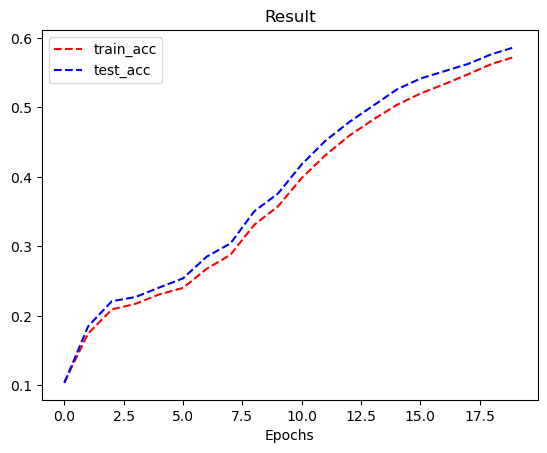

In [593]:
plt.plot(np.arange(1000 // 50), train_acc_list, "r--", label="train_acc")
plt.plot(np.arange(1000 // 50), test_acc_list, "b--", label="test_acc")

plt.title("Result")
plt.xlabel("Epochs")
plt.legend()

plt.show()